<a href="https://colab.research.google.com/github/sheikh-bah/Deep_NN_-_CNN/blob/main/CAT_DOG_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile


In [2]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2021-02-28 10:09:37--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 108.177.126.128, 2a00:1450:4013:c01::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  23.8MB/s    in 2.8s    

2021-02-28 10:09:40 (23.8 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


In [4]:
base_dir = '/tmp/cats_and_dogs_filtered'  # The contents of the .zip are extracted to the base directory /tmp/cats_and_dogs_filtered, which contains train and validation
train = os.path.join(base_dir, 'train')

validation = os.path.join(base_dir, 'validation')

In [5]:

# Directory with our training cat/dog pictures
train_dogs = os.path.join(train, 'dogs')
train_cats = os.path.join(train, 'cats')

In [6]:
train_dogs_list = os.listdir(train_dogs) 
train_cats_list = os.listdir(train_cats)
print(train_dogs_list[:10])
print(train_cats_list[:10])
len(train_dogs_list)


['dog.728.jpg', 'dog.699.jpg', 'dog.715.jpg', 'dog.262.jpg', 'dog.998.jpg', 'dog.814.jpg', 'dog.336.jpg', 'dog.36.jpg', 'dog.986.jpg', 'dog.211.jpg']
['cat.209.jpg', 'cat.189.jpg', 'cat.894.jpg', 'cat.831.jpg', 'cat.796.jpg', 'cat.457.jpg', 'cat.824.jpg', 'cat.307.jpg', 'cat.167.jpg', 'cat.36.jpg']


1000

In [7]:

# Directory with our validation cat/dog pictures
validation_dogs = os.path.join(validation, 'dogs')
validation_cats  = os.path.join(validation, 'cats')

validation_dogs_list = os.listdir(validation_dogs)
validation_cats_list = os.listdir(validation_cats)

print(validation_cats_list[:10])
print(validation_dogs_list[:10])
len(validation_dogs_list)

['cat.2236.jpg', 'cat.2105.jpg', 'cat.2012.jpg', 'cat.2158.jpg', 'cat.2277.jpg', 'cat.2211.jpg', 'cat.2379.jpg', 'cat.2324.jpg', 'cat.2358.jpg', 'cat.2124.jpg']
['dog.2049.jpg', 'dog.2108.jpg', 'dog.2164.jpg', 'dog.2103.jpg', 'dog.2208.jpg', 'dog.2090.jpg', 'dog.2083.jpg', 'dog.2446.jpg', 'dog.2182.jpg', 'dog.2416.jpg']


500

# Now let's take a look at a few pictures to get a better sense of what the cat and dog datasets look like. First, configure the matplot parameters:

In [8]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

count = 0

Now, display a batch of 8 cat and 8 dog pictures. You can rerun the cell to see a fresh batch each time:

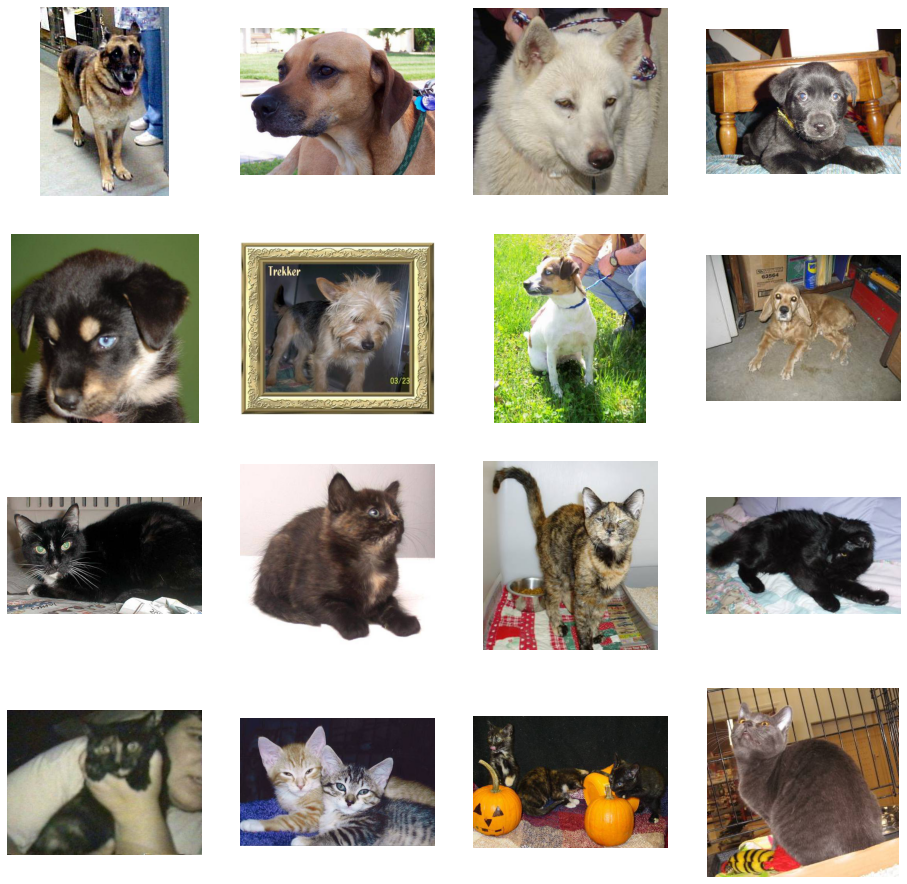

In [9]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

count += 8

next_dog_pic = [os.path.join(train_dogs,fname)
                for fname in train_dogs_list[count-8: count]
                ]

next_cat_pic = [os.path.join(train_cats, fname)
                for fname in train_cats_list[count-8:count]
]


for i, img_path in enumerate(next_dog_pic + next_cat_pic):
   # Set up subplot; subplot indices start at 1
   sp = plt.subplot(nrows, ncols, i+1)
   sp.axis('Off') # Don't show axes (or gridlines)


   img = mpimg.imread(img_path)
   plt.imshow(img)

plt.show()




In [10]:
# Build our model

import tensorflow as tf
from tensorflow import keras


In [11]:
model = keras.models.Sequential([
                                 # Note the input shape is the desired size of the image 150x150 with 3 bytes color
                                 keras.layers.Conv2D(64,(3,3), activation = 'relu', input_shape=(150,150, 3)),
                                 keras.layers.MaxPooling2D(2,2),
                                 keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                                 keras.layers.MaxPooling2D(2,2),
                                 keras.layers.Conv2D(16, (3,3), activation = 'relu'),
                                 keras.layers.MaxPooling2D(2,2),
                                 # Flatten the results to feed into a DNN
                                 keras.layers.Flatten(),
                                 # 512 neuron
                                 keras.layers.Dense(512, activation = 'relu'),
                                 # 1 output neuron
                                 keras.layers.Dense(1, activation = 'sigmoid')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4624)              0

Next, we'll configure the specifications for model training. We will train our model with the `binary_crossentropy` loss, because it's a binary classification problem and our final activation is a sigmoid. 

In [13]:
from tensorflow.keras.optimizers import RMSprop

In [14]:
model.compile(optimizer=RMSprop(lr = 0.001), loss = 'binary_crossentropy', metrics = 'accuracy')

# Data Preprocessing

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images must be rescaled

train_datagen = ImageDataGenerator(rescale= 1/255)
validation_datagen = ImageDataGenerator(rescale = 1/255)

# Flow training images in batches of 20 using train_datagen generator

train_generator = train_datagen.flow_from_directory(train,
                                                    target_size = (150, 150),
                                                    class_mode = 'binary',
                                                    batch_size  = 20)



validation_generator = validation_datagen.flow_from_directory(validation,
                                                              target_size = (150, 150),
                                                              class_mode = 'binary',
                                                              batch_size = 20
                                                              )


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
history =model.fit(train_generator, epochs = 15, verbose = 2, steps_per_epoch= 100, 
          validation_data = validation_generator,
          validation_steps = 50
        )

Epoch 1/15
100/100 - 82s - loss: 0.7426 - accuracy: 0.5180 - val_loss: 0.6873 - val_accuracy: 0.6350
Epoch 2/15
100/100 - 79s - loss: 0.6913 - accuracy: 0.5990 - val_loss: 0.6816 - val_accuracy: 0.5470
Epoch 3/15
100/100 - 80s - loss: 0.6390 - accuracy: 0.6555 - val_loss: 0.6277 - val_accuracy: 0.6630
Epoch 4/15
100/100 - 80s - loss: 0.5651 - accuracy: 0.7120 - val_loss: 0.6978 - val_accuracy: 0.6080
Epoch 5/15
100/100 - 85s - loss: 0.5077 - accuracy: 0.7520 - val_loss: 0.6447 - val_accuracy: 0.6510
Epoch 6/15
100/100 - 80s - loss: 0.4334 - accuracy: 0.7995 - val_loss: 0.6251 - val_accuracy: 0.7010
Epoch 7/15
100/100 - 80s - loss: 0.3462 - accuracy: 0.8405 - val_loss: 0.6446 - val_accuracy: 0.7200
Epoch 8/15
100/100 - 80s - loss: 0.2464 - accuracy: 0.9005 - val_loss: 0.7072 - val_accuracy: 0.6970
Epoch 9/15
100/100 - 80s - loss: 0.1771 - accuracy: 0.9300 - val_loss: 0.9572 - val_accuracy: 0.7130
Epoch 10/15
100/100 - 80s - loss: 0.1155 - accuracy: 0.9605 - val_loss: 0.9705 - val_accura

###Running the Model

Let's now take a look at actually running a prediction using the model. This code will allow you to choose 1 or more files from your file system, it will then upload them, and run them through the model, giving an indication of whether the object is a dog or a cat.

In [22]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
uploaded = files.upload()

for fn in uploaded.keys():
  # predicting images
  path = '/content/' + fn
  x = image.load_img(path, target_size = (150, 150))

  x = np.expand_dims(x, axis = 0)
  images = np.vstack([x])


  classes = model.predict(images, batch_size = 10)
  print(classes[0])

  if classes[0] > 0:
    print( fn + 'is a dog')


  else:
    print(fn + 'is a cat')


Saving cat.jfif to cat (1).jfif
[0.]
cat.jfifis a cat


### Visualizing Intermediate Representations

To get a feel for what kind of features our convnet has learned, one fun thing to do is to visualize how an input gets transformed as it goes through the convnet.

Let's pick a random cat or dog image from the training set, and then generate a figure where each row is the output of a layer, and each image in the row is a specific filter in that output feature map. Rerun this cell to generate intermediate representations for a variety of training images.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in true_divide


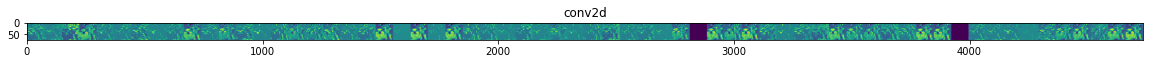

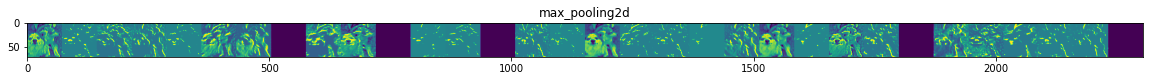

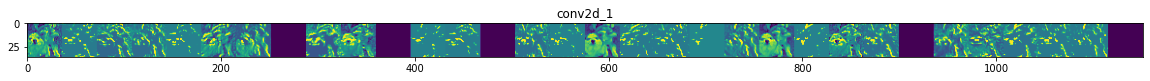

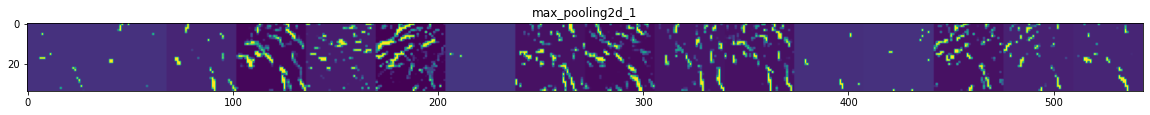

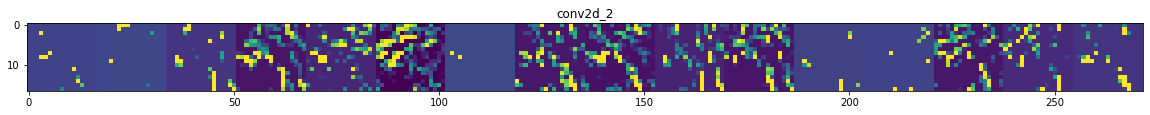

In [21]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after the first

successive_layers = [layer.output for layer in model.layers[1:]]

# visualizion_model  = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_layers)


# Let's prepare a random input image of a cat or dog from the training set.
cat_img_files = [os.path.join(train_cats, f) for f in train_cats_list]
dog_img_files = [os.path.join(train_dogs,f) for f in train_dogs_list]

img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size = (150, 150)) # this is a PIL image

x = img_to_array(img)      # Numpy array with shape (150, 150, 3)
x = x.reshape((1,)+ x.shape) # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x = x/255


# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
  if len(feature_map.shape) == 4:
    
    #-------------------------------------------
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    #-------------------------------------------
    n_features = feature_map.shape[-1]  # number of features in the feature map
    size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    
    #-------------------------------------------------
    # Postprocess the feature to be visually palatable
    #-------------------------------------------------
    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std ()
      x *=  64
      x += 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

#Evaluating Accuracy and Loss for the Model
#Let's plot the training/validation accuracy and loss as collected during training:

Text(0.5, 1.0, 'Training and validation loss')

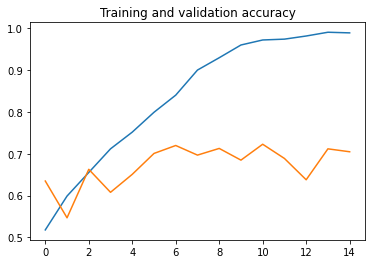

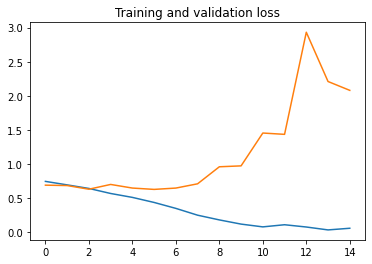

In [27]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )